# Fourier Transform

#spatial domain--> coordinate jeta setai. Kaj gula slow & inefficient hoye jay.
Frequency domain--> 

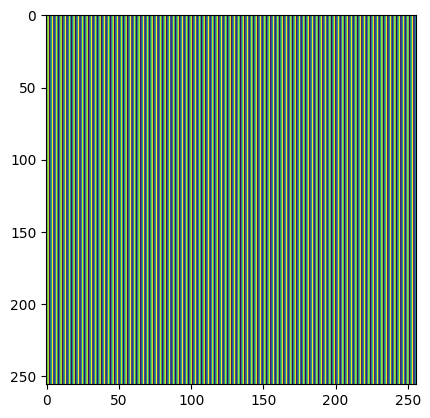

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


x = np.arange(256)
y = np.sin(2 * np.pi * x / 3)

y += max(y) 


img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8)

plt.imshow(img)

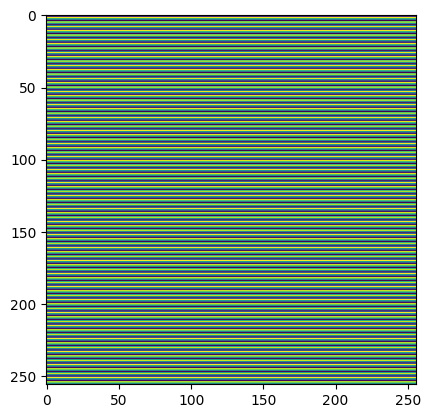

In [2]:
img = np.rot90(img)  #Rotate img by 90 degrees

plt.imshow(img)

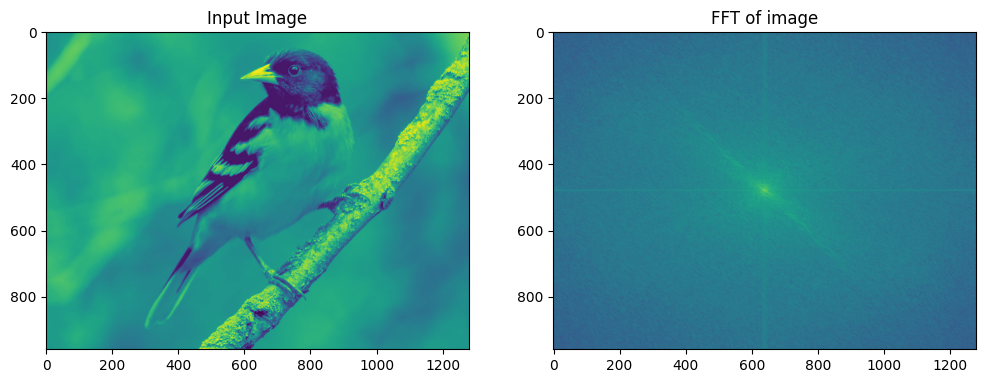

In [3]:
img = cv2.imread('bird.jpg', 0) # load an image

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)


dft_shift = np.fft.fftshift(dft)


magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)


fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()

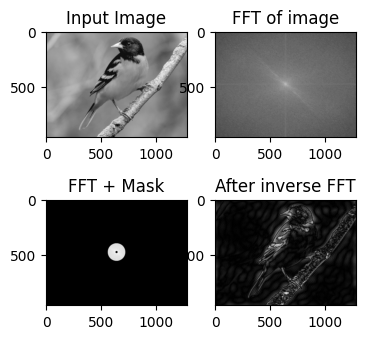

In [14]:
# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)

# mask = np.ones((rows, cols, 2), np.uint8)
# r = 80
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
# mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)

# mask = np.zeros((rows, cols, 2), np.uint8)
# r = 100
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
# mask[mask_area] = 1

# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1

# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]+1e-8))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


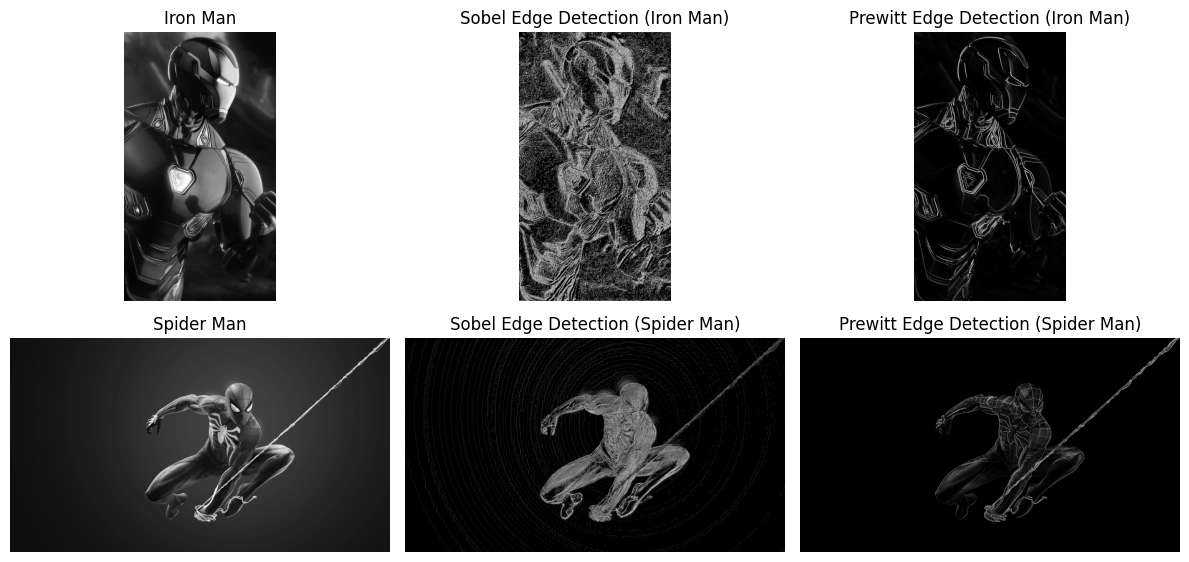

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_operator(img):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    gradient_x = cv2.filter2D(img, -1, sobel_x)
    gradient_y = cv2.filter2D(img, -1, sobel_y)

    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    
    return gradient_magnitude

image1 = cv2.imread('man_of_culture.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('childhood_favourite.webp', cv2.IMREAD_GRAYSCALE)

edges_sobel1 = sobel_operator(image1)
edges_sobel2 = sobel_operator(image2)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewitt_x1 = cv2.filter2D(image1, -1, kernelx)
prewitt_y1 = cv2.filter2D(image1, -1, kernely)
edges_prewitt1 = cv2.bitwise_or(prewitt_x1, prewitt_y1)

prewitt_x2 = cv2.filter2D(image2, -1, kernelx)
prewitt_y2 = cv2.filter2D(image2, -1, kernely)
edges_prewitt2 = cv2.bitwise_or(prewitt_x2, prewitt_y2)

# Plot the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Iron Man')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_sobel1, cmap='gray')
plt.title('Sobel Edge Detection (Iron Man)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edges_prewitt1, cmap='gray')
plt.title('Prewitt Edge Detection (Iron Man)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image2, cmap='gray')
plt.title('Spider Man')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edges_sobel2, cmap='gray')
plt.title('Sobel Edge Detection (Spider Man)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(edges_prewitt2, cmap='gray')
plt.title('Prewitt Edge Detection (Spider Man)')
plt.axis('off')

plt.tight_layout()
plt.show()
